<a href="https://colab.research.google.com/github/RaufHood/thesis/blob/main/HDC_without_shift_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
import time
from IPython import display

In [ ]:
def f_0(theta, theta_0):
  n_HDC = 100
  A = 2.53 #Hz
  K = 8.08
  B = 35.8/np.exp(K)
  #theta_0 = k* 1/n_HDC * 2* np.pi
  f_o = A + B * np.exp(K*np.cos(theta-theta_0))
  return f_o


def targetPeakDefault(x):
  K = 5.29
  A = 1.72
  B = 0.344
  return A + B*np.exp(K*np.cos(x))


# transfer function
def phi_(x):
  r_m = 76.2 #Hz
  beta = 0.82
  h_0 = 2.46
  out=r_m/(1+np.exp(-beta*(x-h_0)))
  return out

# inverse of the transfer function
def phi_inv(f):
  r_m = 76.2 #Hz
  beta = 0.82
  h_0 = 2.46
  return h_0+np.log(-f /(f-r_m))/beta

In [ ]:
n_HDC = 100                          # define the number of neurons
theta = np.linspace(0, 2*np.pi, 100) # define angles

In [ ]:
def get_weight_u(theta):
  #for i in range(n_HDC):             #calculate the weigth vector w (representing connections of one neuron to all other neurons)
                                     #for each neuron n
  #preference_angle = theta[i]
  f = targetPeakDefault(theta) #f_0(np.zeros_like(theta), -preference_angle) # define firing rate 
  u = phi_inv(f)                   # calculate the synaptic input
  f_ = np.fft.fft(f)               # calculate the fourier transoform
  u_ = np.fft.fft(u)
  
  lam = 25824                               # regularization parameter
  #if i==1:
  #  print((u_*f_).shape,u.shape)
  w_ = np.fft.ifft( u_*f_/(lam+np.abs(f_)**2)) # closed form solution for w_
  #print(w.shape, w_array.shape)
                            
  w = np.fft.ifft(w_)
  #w_array[:] = w                          # save it in the weight matrix
  #conv = np.fft.ifft(w_*f_)                 # calculate the convolution for diff. eq. for u
  #print(w.shape)
  return (u, w) #, conv)

def connection(i, j):
        def resolve_index(i,j,n_HDC):
            if abs(i-j)>float(n_HDC)/2.0:
                return abs(abs(i-j)-float(n_HDC))
            else:
                return abs(i-j)
        return np.real(w[int(resolve_index(i, j, n_HDC))])

In [ ]:
firing_rates = np.zeros(n_HDC)
f = targetPeakDefault(theta)
w, u = get_weight_u(theta)

This is the tuning curve we want to have, stable over time in absence of external stimuly (angular velocity of the head = 0)

In [ ]:
'''plt.plot(theta, f_0(theta, np.pi))
plt.xlabel("angle (rad)")
plt.ylabel("firing rate (spikes/s)")'''

'plt.plot(theta, f_0(theta, np.pi))\nplt.xlabel("angle (rad)")\nplt.ylabel("firing rate (spikes/s)")'

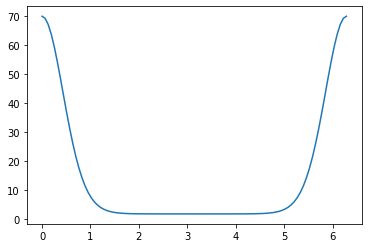

In [ ]:
plt.plot(theta, f)

In [ ]:
#print(f)
conn_matrix = np.zeros((n_HDC, n_HDC))
for i in range(n_HDC):
    for j in range(n_HDC):
        conn_matrix[i,j] = connection(i,j)


These are the weights reppresenting the connection of HDC cells to each other.  
One row of the matrix is the connection of one HDC to all the others leading to a connection matrix of shape (100 x 100)

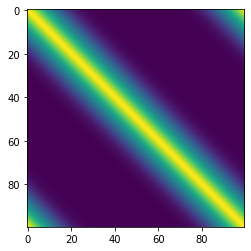

In [ ]:
plt.imshow(conn_matrix)

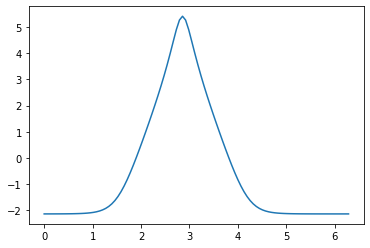

In [ ]:
len(conn_matrix[45])
plt.plot(theta,conn_matrix[45])

In [ ]:

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

In [ ]:
class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex
    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)
    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

(array([0]), <a list of 1 Text major ticklabel objects>)

<ipython-input-38-644cc7ad3765>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num = np.int(np.rint(den*x/number))


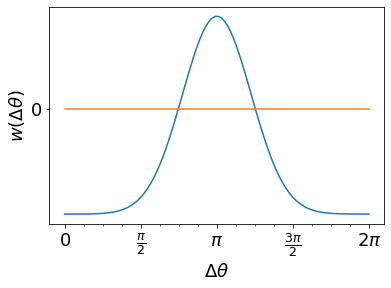

In [ ]:
fig, ax = plt.subplots()
len(conn_matrix[45])
plt.plot(theta,15*np.exp(-(theta-np.pi)**2/1)-8)
plt.plot(theta, np.zeros_like(theta))
plt.xlabel("$\Delta \\theta$", fontsize=18)
plt.ylabel("$w(\\Delta \\theta)$", fontsize=18)
ax.set_yticklabels([0])
plt.yticks([0])
den =2
major = Multiple(den, np.pi, r'\pi')
minor = Multiple(den*4, np.pi, r'\pi')
ax.xaxis.set_major_locator(major.locator())
ax.xaxis.set_minor_locator(minor.locator())
ax.xaxis.set_major_formatter(major.formatter())
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [ ]:
theta

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

Here is a simulation for (200.000 steps = 200 s). The formed pattern is stable over time after 25 steps = 25 ms, however there is an offset which we account by subtraction at the readout time.

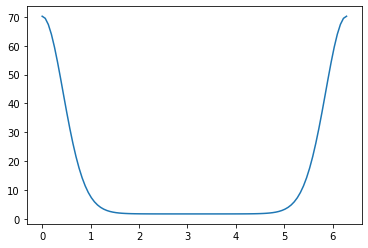

In [ ]:
tau1 = 0.02
dt = 0.001
f_list = []
l = 200000
#f = np.zeros(n_HDC)
for i in range(l):
    u = np.dot(w,f.T)
    f_new = phi_(u)
    f2 = (f_new-f)*dt/tau1 + f
    f_list.append(f2)
    f = 1.0526316*f2
f = f - (110.4468-1.7217)
#to have the desired shape : scale f = alpha * f for each iteration
# and adding an offset f = f + beta
plt.plot(theta,f)

In [ ]:
print(np.min(f))

1.7217262662162796


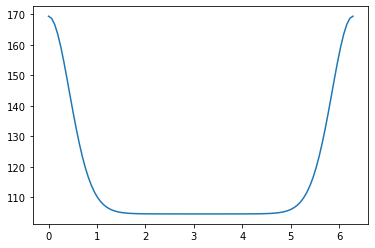

In [ ]:
%matplotlib inline
for i in range(l):
    try:
        plt.clf()
        plt.plot(theta, f_list[i])
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
        plt.xlim(0,7)
        plt.ylim(-10,10)
        print(i)
    except KeyboardInterrupt:
        break
